<a href="https://colab.research.google.com/github/ralphcajipe/Deep-Learning-with-Python/blob/main/IMDB_classify-movie-reviews-a-binary-classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classifying movie reviews: A binary classfication example
Problem: Classify movie reviews as positive or negative, based on the text content of the reviews (sequence of words).

### The IMDB dataset
**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [ ]:
print(train_data[0], end='')

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]

In [ ]:
train_labels[0]

1

In [2]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [3]:
# word_index is a dictionary mapping words to an integer index.
word_index = imdb.get_word_index()

# Reverses it, mapping integer indices to words
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)

# Decodes the review. Note that the indices are offset by 3
# because 0, 1, and 2 are reserved indices for "padding,"
# "start of sequence," and "unknown."
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]]
)

### Preparing the data
**Encoding the integer sequences via multi-hot encoding**

In [4]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    """Vectorizing the sequence of words."""
    
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            # Sets specific indices of results[i] to 1s
            results[i, j] = 1
    return results

# Vectorized training data
x_train = vectorize_sequences(train_data)

# Vectorized test data
x_test = vectorize_sequences(test_data)

In [ ]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
# Vectorize your labels too
y_train = np.asarray(train_labels).astype("float32")
y_test = np.array(test_labels).astype("float32")

### Building your model
**Model definition**

In [6]:
from tensorflow import keras
from tensorflow.keras import layers

# Creating a sequential model with 3 layers
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [7]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach
**Setting aside a validation set**

In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [9]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 52ms/step - loss: 0.5223 - accuracy: 0.7761 - val_loss: 0.3872 - val_accuracy: 0.8710
Epoch 2/20
30/30 [==============================] - 1s 36ms/step - loss: 0.3126 - accuracy: 0.8979 - val_loss: 0.3217 - val_accuracy: 0.8759
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2230 - accuracy: 0.9271 - val_loss: 0.2784 - val_accuracy: 0.8918
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1760 - accuracy: 0.9421 - val_loss: 0.2746 - val_accuracy: 0.8909
Epoch 5/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1406 - accuracy: 0.9559 - val_loss: 0.3203 - val_accuracy: 0.8739
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1188 - accuracy: 0.9630 - val_loss: 0.2932 - val_accuracy: 0.8861
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.0964 - accuracy: 0.9717 - val_loss: 0.3101 - val_accuracy: 0.8838
Epoch 8/20
30

In [10]:
history_dict = history.history
print(history_dict.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


**Plotting the training and validation loss**

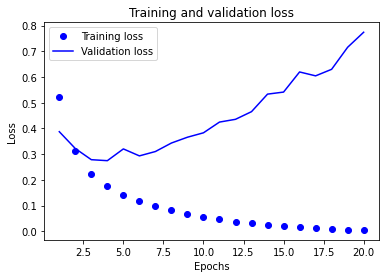

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

# "bo" is for "blue dot."
plt.plot(epochs, loss_values, "bo", label="Training loss")

# "b" is for "solid blue line."
plt.plot(epochs, val_loss_values, "b", label="Validation loss")

plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

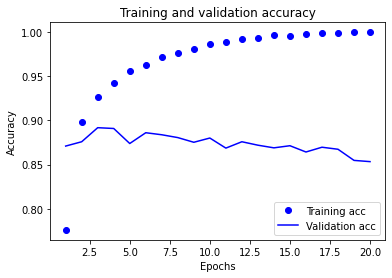

In [12]:
# Clears the figure
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Experienced overfitting! ⚠


**Retraining a model from scratch**

In [21]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 29ms/step - loss: 0.4721 - accuracy: 0.8253
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2748 - accuracy: 0.9041
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2104 - accuracy: 0.9262
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.2956 - accuracy: 0.8818


In [22]:
# Print test loss and test accuracy
print(results)
print(f"Test loss: {results[0]:.2%}")
print(f"Test accuracy: {results[1]:.2%}")

[0.29557690024375916, 0.8817999958992004]
Test loss: 29.56%
Test accuracy: 88.18%


This fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, you should be able to get close to 95%.

### Using a trained model to generate predictions on new data

In [ ]:
model.predict(x_test)

array([[0.16784003],
       [0.9996662 ],
       [0.7459982 ],
       ...,
       [0.0937981 ],
       [0.0688417 ],
       [0.42772937]], dtype=float32)

### Further experiments

- Try using one or three representational layers.
- Try using layers with more units or fewer units: 32 units, 64 units, and so on.
- Try using the `mse` loss function instead of binary_crossentropy.
- Try using the `tanh` activation instead of relu.

### Experiment 1

In [24]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 30ms/step - loss: 0.4469 - accuracy: 0.8281
Epoch 2/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2767 - accuracy: 0.9094
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2206 - accuracy: 0.9241
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2811 - accuracy: 0.8880


In [25]:
# Print test loss and test accuracy
print(results)
print(f"Test loss: {results[0]:.2%}")
print(f"Test accuracy: {results[1]:.2%}")

[0.28108981251716614, 0.8879600167274475]
Test loss: 28.11%
Test accuracy: 88.80%


Using one representation layer reduced the test loss from 29.56% to 28.11% and this improved the accuracy to 88.80%.

In [26]:
model.predict(x_test)

array([[0.26736757],
       [0.99949634],
       [0.8749909 ],
       ...,
       [0.16164413],
       [0.1265837 ],
       [0.58584374]], dtype=float32)

### Experiment 2 and Wrapping up (summaries)

In [27]:
model = keras.Sequential([
    # Stacks of Dense layers with relu activations can solve a wide range of
    # problems.
    layers.Dense(16, activation="relu"),

    # In a binary classification problem (two output classes), your model
    # should end with a Dense layer with one unit and a sigmoid activation:
    # the output of your model should be a scalar between 0 and 1, 
    # encoding a probability.
    layers.Dense(1, activation="sigmoid")
])

# The rmsprop optimizer is generally a good enough choice, whatever your problem.
# That's one less thing for you to worry about.
model.compile(optimizer="rmsprop",
              # With such a sigmoid output on a binary classification problem,
              # the loss function you should use is binary_crossentropy.
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
49/49 [==============================] - 2s 30ms/step - loss: 0.4642 - accuracy: 0.8302
Epoch 2/3
49/49 [==============================] - 1s 30ms/step - loss: 0.2920 - accuracy: 0.9025
Epoch 3/3
782/782 [==============================] - 2s 2ms/step - loss: 0.2835 - accuracy: 0.8891


In [28]:
# Print test loss and test accuracy
print(results)
print(f"Test loss: {results[0]:.2%}")
print(f"Test accuracy: {results[1]:.2%}")

[0.2834809422492981, 0.8891199827194214]
Test loss: 28.35%
Test accuracy: 88.91%


Using one representation layer and training on 3 epochs improved the accuracy to 88.91%.

In [20]:
"""
As they get better on their training data, neural networks eventually
start overfitting and end up obtaining increasingly worse results on 
data they've never seen before. Be sure to always monitor performance
on data that is outside of the training set.
"""
model.predict(x_test)

array([[0.05805153],
       [0.9999995 ],
       [0.91047204],
       ...,
       [0.14326373],
       [0.01902735],
       [0.92388654]], dtype=float32)